In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('final_descriptors.csv')
df.dropna(axis=0, inplace=True)
df

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.277519,13.277519,0.036389,-0.511565,0.489318,12.550000,266.231,259.175,266.049156,96,...,0,0,0,0,0,0,0,0,0,0
1,12.817228,12.817228,0.033613,-0.447936,0.610144,18.434783,373.246,356.110,372.036107,118,...,0,0,0,0,0,0,0,0,0,0
2,12.567572,12.567572,0.144414,-0.250445,0.498010,12.550000,282.686,275.630,282.019605,96,...,0,0,0,0,0,0,0,0,0,0
3,10.155652,10.155652,0.227007,0.227007,0.415814,11.500000,310.356,296.244,310.110613,114,...,0,0,0,0,0,0,0,0,0,0
4,13.331481,13.331481,0.056111,-0.854630,0.573824,10.466667,208.148,203.108,208.028420,76,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,10.019296,10.019296,0.163353,-0.163353,0.811838,23.684211,324.222,306.078,323.063324,102,...,0,0,0,0,0,0,0,0,0,0
756,4.081375,4.081375,0.593456,0.593456,0.815194,19.941176,295.184,280.064,294.048009,90,...,0,0,0,0,0,0,0,0,0,0
757,12.755531,12.755531,0.005596,-0.567519,0.819410,18.391304,310.349,292.205,310.120509,118,...,0,0,0,0,0,0,0,0,0,0
758,12.958814,12.958814,0.025877,-0.562666,0.331791,11.555556,271.639,264.583,271.027230,94,...,0,0,0,0,0,0,0,0,0,0


In [3]:
target = pd.read_csv('multitarget.csv')
#target.drop('Unnamed: 0', axis=1, inplace=True)
target

,ido_tdo
0,AA
1,II
2,AI
3,II
4,II
...,...
752,II
753,II
754,IA
755,AI


In [4]:
encoder = LabelEncoder()

In [13]:
y_labeled = encoder.fit_transform(target['ido_tdo'])

In [14]:
y_labeled

array([0, 3, 1, 3, 3, 2, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 3, 0, 2, 3, 3, 1, 2, 1, 2, 3, 3, 2, 3, 3,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 1, 3, 0, 0, 1,
       3, 0, 2, 1, 3, 3, 1, 0, 1, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 1, 0, 3,
       1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 3, 0, 0, 3, 0,
       1, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 3, 1, 1, 2, 0, 3, 3, 0, 0, 3, 0, 3, 0,
       3, 3, 3, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 3, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 3, 0, 3, 3, 3, 2, 2, 0, 1, 0, 2, 3, 0, 0, 1, 0, 0, 0, 3,
       3, 0, 0, 3, 3, 1, 2, 3, 0, 3, 0, 2, 0, 1, 3, 1, 0, 0, 3, 3, 0, 0,
       2, 1, 0, 3, 0, 3, 3, 0, 3, 3, 1, 1, 3, 3, 0,

In [15]:
x_scaled = StandardScaler().fit_transform(df.values)

In [16]:
perplexity = np.arange(1, 100, 5)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(x_scaled)
    divergence.append(model.kl_divergence_)

In [17]:
divergence

[0.49180328845977783,
 0.4675081968307495,
 0.4640718698501587,
 0.4670236110687256,
 0.4648285508155823,
 0.45646387338638306,
 0.43260204792022705,
 0.42690297961235046,
 0.4201616048812866]

In [26]:
#the perplexity parameter was evaluated over the range of 1 to 100 and 
#the minimum value of Kullback-Leibler divergence was found in the perplexity = 3 (kl_divergence = 0.37).

In [18]:
tsne = TSNE(n_components=2, perplexity=3)
X_tsne = tsne.fit_transform(x_scaled)
tsne.kl_divergence_

0.3769187033176422

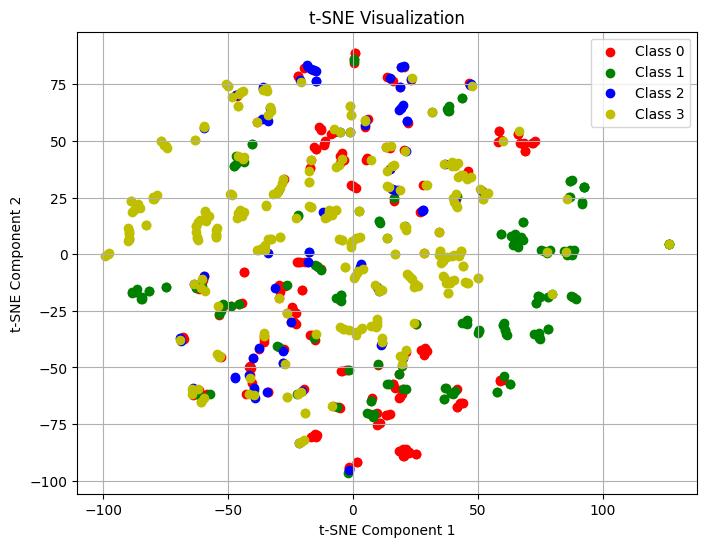

In [19]:
plt.figure(figsize=(8, 6))
for i, c in zip(np.unique(y_labeled), ['r', 'g', 'b', 'y']):
    plt.scatter(X_tsne[y_labeled == i, 0], X_tsne[y_labeled == i, 1], c=c, label=f'Class {i}')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)

In [35]:
perplexity = np.arange(1, 100, 5)
divergence_3D = []

for i in perplexity:
    model = TSNE(n_components=3, init="pca", perplexity=i)
    reduced = model.fit_transform(x_scaled)
    divergence_3D.append(model.kl_divergence_)

In [36]:
divergence_3D

[0.3065008819103241,
 0.2830086350440979,
 0.2879938781261444,
 0.3212055265903473]

In [20]:
tsne = TSNE(n_components=3, perplexity=2, random_state=42)
X_tsne = tsne.fit_transform(x_scaled)
tsne.kl_divergence_

0.29950231313705444

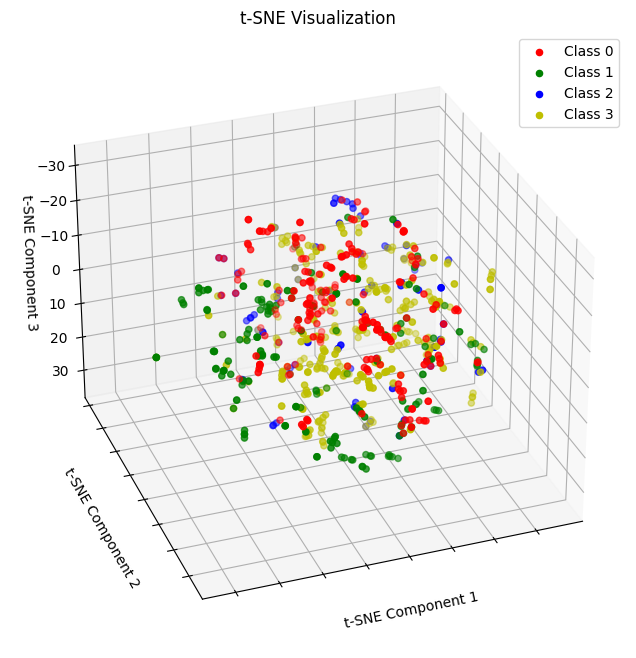

In [21]:
f = plt.figure(figsize=(12, 8))
ax = f.add_subplot(111, projection="3d", elev=-150, azim=110)
for i, c in zip(np.unique(y_labeled), ['r', 'g', 'b', 'y']):
    ax.scatter(X_tsne[y_labeled == i, 0], X_tsne[y_labeled == i, 1], X_tsne[y_labeled == i, 2], c=c, label=f'Class {i}')
ax.set_title("t-SNE Visualization")
ax.set_xlabel("t-SNE Component 1")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("t-SNE Component 2")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("t-SNE Component 3")
plt.legend();